# Notebook 4: Ridge and Lasso Regression
Since we are dealing with a lot of multicollinearity in our world bank data, we expect Ridge and Lasso regression to perform better than the least squares regression from Notebook 2.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import glob
import pandas as pd
import sklearn
from src import ana_utils as utils

from sklearn import linear_model

np.random.seed(1)

Import datasets from Notebook 1

In [2]:
wb_data = pd.read_csv("data/wb_data.csv", index_col="Country Name")
wb_data_short = pd.read_csv("data/wb_data_short.csv", index_col="Country Name")
whr_data = pd.read_csv("data/whr_data.csv", index_col="Country name")

Import reduced datasets from Notebook 3

In [3]:
wb_data_pear_reduced_15 = pd.read_csv("data/wb_data_pear_reduced_15.csv").set_index(wb_data.index, inplace=True)
wb_data_pear_reduced_30 = pd.read_csv("data/wb_data_pear_reduced_30.csv").set_index(wb_data.index, inplace=True)
wb_data_vif_reduced_15 = pd.read_csv("data/wb_data_vif_reduced_15.csv").set_index(wb_data.index, inplace=True)
wb_data_vif_reduced_30 = pd.read_csv("data/wb_data_vif_reduced_30.csv").set_index(wb_data.index, inplace=True)

## Ridge Regression

In [4]:
ridge = sklearn.linear_model.Ridge()

Mean loss (full set of indicators): 0.37192413726982193
The average size of the first ten coefficients ((full set of indicators)): [ 0.3016  0.1392  0.2037  0.1831 -0.1228 -0.1387  0.2448 -0.2601 -0.2179
 -0.6856] 

Mean loss (reduced set of indicators): 0.38553260037251713
The average size of the first ten coefficients (reduced set of indicators): [ 0.334   0.1544  0.194   0.0096 -0.17    0.2838 -0.3028 -0.2603 -0.8606
 -0.4861]


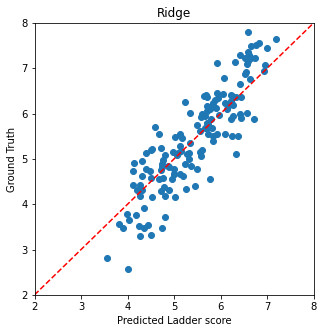

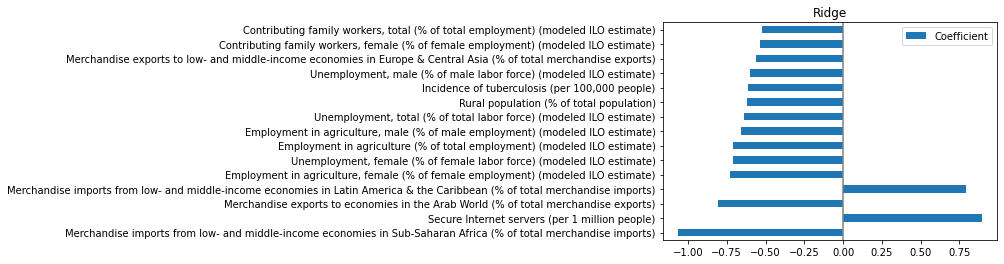

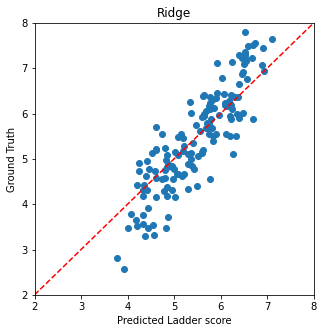

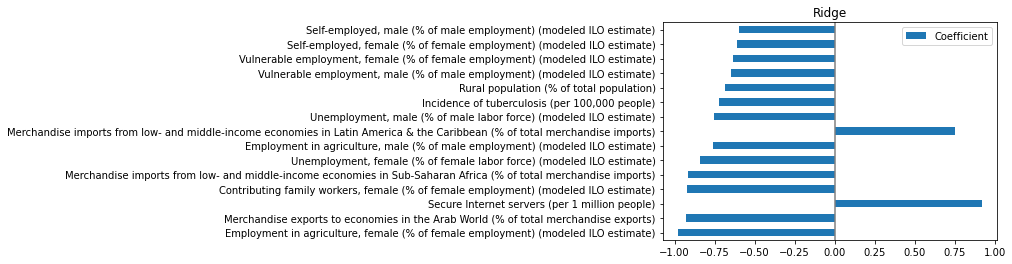

In [5]:
test_size = 30
# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (full set of indicators):", mean_loss)
print("The average size of the first ten coefficients ((full set of indicators)):", avg_coefs[:10], "\n")
utils.visualize_predictions(reg_model=ridge, data=wb_data, gt=whr_data)
utils.visualize_coefs(reg_model=ridge, indicators=wb_data.columns.values, n=15)

loss_list, mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data_short, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (reduced set of indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs[:10])
utils.visualize_predictions(reg_model=ridge, data=wb_data_short, gt=whr_data)
utils.visualize_coefs(reg_model=ridge, indicators=wb_data_short.columns.values, n=15)


## Lasso regression

In [6]:
lasso = sklearn.linear_model.Lasso(alpha=0.001)

Mean loss (full set of indicators): 0.37956026366177303
The average size of the first ten coefficients ((full set of indicators)): 0.5962 

Mean loss (reduced set of indicators): 0.3791970035740321
The average size of the first ten coefficients (reduced set of indicators): 0.6715


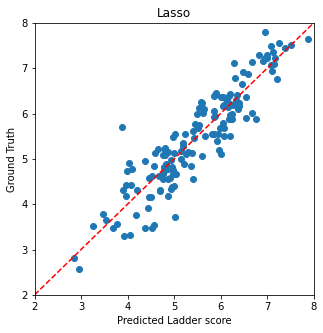

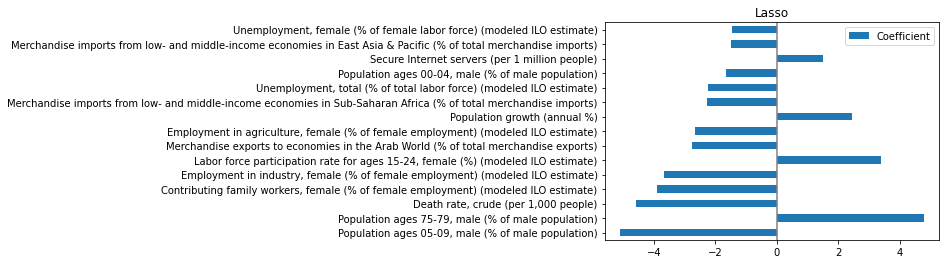

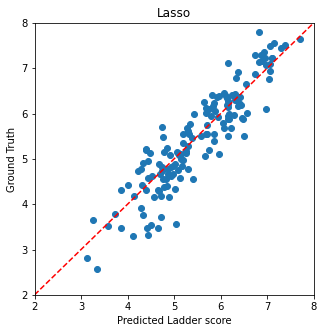

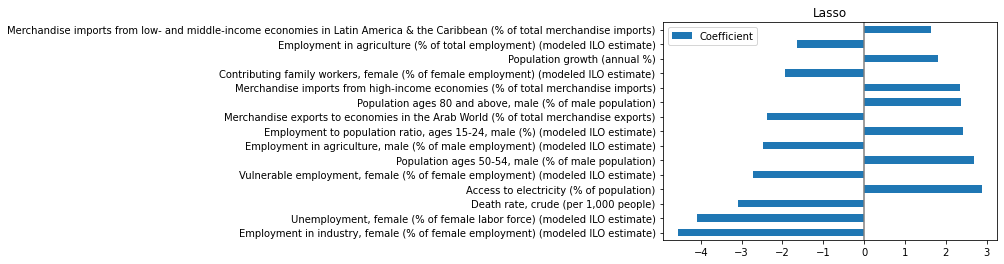

In [7]:
# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (full set of indicators):", mean_loss)
print("The average size of the first ten coefficients ((full set of indicators)):", avg_coefs, "\n")
utils.visualize_predictions(reg_model=lasso, data=wb_data, gt=whr_data)
utils.visualize_coefs(reg_model=lasso, indicators=wb_data.columns.values, n=15)

# reset lasso parameters before re-training
lasso = sklearn.linear_model.Lasso(alpha=0.001)

loss_list, mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (reduced set of indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs)
utils.visualize_predictions(reg_model=lasso, data=wb_data, gt=whr_data)
utils.visualize_coefs(reg_model=lasso, indicators=wb_data.columns.values, n=15)

## Optimizing penalty parameter $\alpha$

In [16]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

In [17]:
for alpha in alphas:
    ridge = sklearn.linear_model.Ridge(alpha=alpha)    
    loss_list, ridge_mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
    print("Mean loss for Ridge (alpha =", alpha, "):", ridge_mean_loss)
    
    lasso = sklearn.linear_model.Lasso(alpha=alpha)
    loss_list, lasso_mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
    print("Mean loss for Lasso (alpha =", alpha, "):", lasso_mean_loss)


Mean loss for Ridge (alpha = 0.001 ): 0.7884593349612126
Mean loss for Lasso (alpha = 0.001 ): 0.7389871470617027
Mean loss for Ridge (alpha = 0.01 ): 0.47564646596445226
Mean loss for Lasso (alpha = 0.01 ): 0.4733345629666063
Mean loss for Ridge (alpha = 0.1 ): 0.339971075332776
Mean loss for Lasso (alpha = 0.1 ): 0.34445318491272003
Mean loss for Ridge (alpha = 1 ): 0.36524985061374304
Mean loss for Lasso (alpha = 1 ): 0.36677086708320245
Mean loss for Ridge (alpha = 10 ): 0.6875939157893577
Mean loss for Lasso (alpha = 10 ): 0.6852558570007916
Mean loss for Ridge (alpha = 100 ): 1.14125251468321
Mean loss for Lasso (alpha = 100 ): 1.1233236260935766


Best alpha for ridge:  0.1
Best alpha for lasso:  0.01


0.49765286681217835

### TODO: visualization for different alpha parameters

Mean loss (alpha =  0.01 ): 0.4907174228243684
Mean loss (alpha =  0.1 ): 1.2706716902476882
Mean loss (alpha =  1 ): 1.255810940926582
Mean loss (alpha =  10 ): 1.2670474823643472
Mean loss (alpha =  100 ): 1.25639279064537


(5, 5)